## **Support Vector Machine(SVM)**

* SVM is a potent supervised algorithm that excels on complex, yet tiny datasets. 
* Although Support Vector Machine, often known as SVM, can be used for regresion and classification tasks, they typically perform best in the latter.
* We seek the optimal **hyperplane** to divide the two classes in this supervised machine learning issue.
* A decision boundary (such as a point, a line, or a plane) that divides data classes is known as a hyper-plane.
* The key distinction between the algorithms logistic regression and SVM is that the former uses a probabilistic approach while the latter is based on statistical methods. Both algorithms seek to identify the optimum hyperplane. 
* With the SVM algorithm, each data point is represented as a point in an n-dimensional space (where n is the number of features you have), with each feature's value being the value of a certain coordinate. Then, we carry out classification by identifying the hyper-plane that effectively distinguishes the two classes.


* 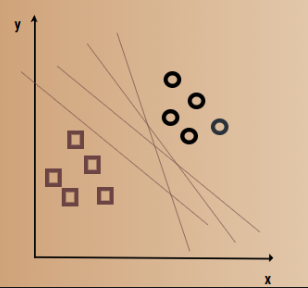

* SVM selects the extreme vectors that aid in the hyperplane's creation. SVM algorithm is based on these extreme vectors knwon as support vectors.

* Consider the diagram below, where a decision boundary or hyperplane is used to categories two distinct categories:

    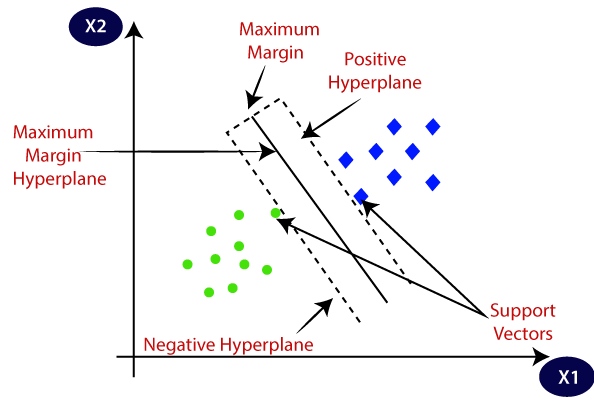

**Types of SVM**

In general SVM are of two types:

**Linear SVM:**
The term "linearly separable data" refers to data that can be divided into two groups using only a single straight line. Linear SVM is used to classify such data, and the classifier utilised is known as the Linear SVM classifier.

**Non-linear SVM:**
When a dataset cannot be categorized using a straight line, it is said to be non-linear, and the classification algorithm utilised is known as a non-linear SVM classifier.

**Hyperplane:**

In n-dimensional space, there may be several lines or decision boundaries used to separate the classes, but we must identify the optimum decision boundary that best aids in classifying the data points. The optimal boundry is considered as the hyperplane.

**Support Vectors:**

Support vectors are the data points or vectors that are closest to the hyperplane and have the greatest influence on where the hyperplane is located. 

**How does SVM works?**

**Linear SVM:**
The working of the SVM algorithm can be understood by using an example.

  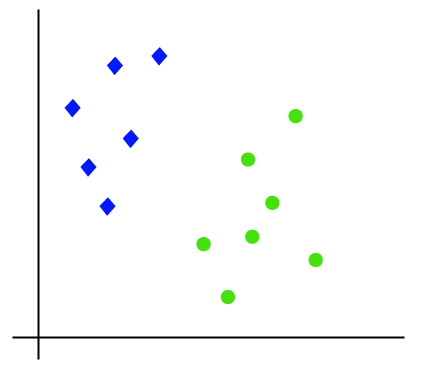

   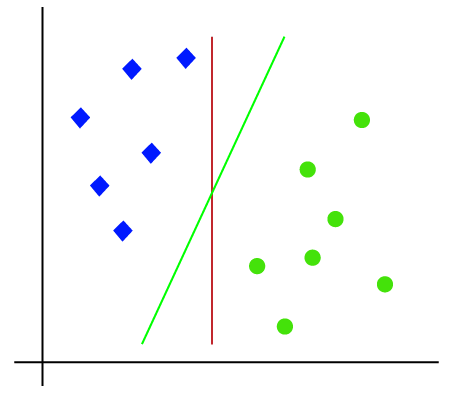

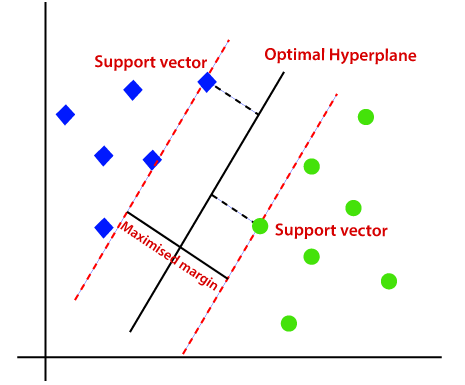

**Non-Linear SVM:**

It is impossible to separate non-linear data with a straight line. 

  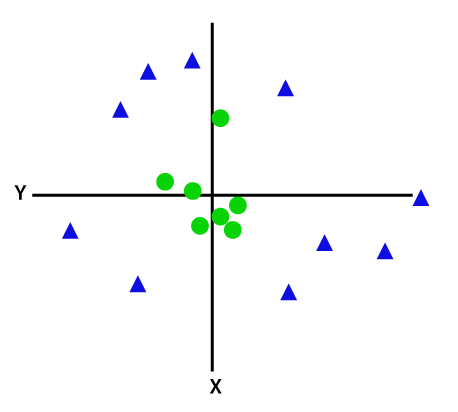


Adding one or more dimension may help us to separate these data points. Linear data requires, two dimensions, x and y. For non-linear we add third dimension, z, too.

It can be calculated as:

z=x2 +y2

Here we just added third dimension, the sample space will look like below image:

  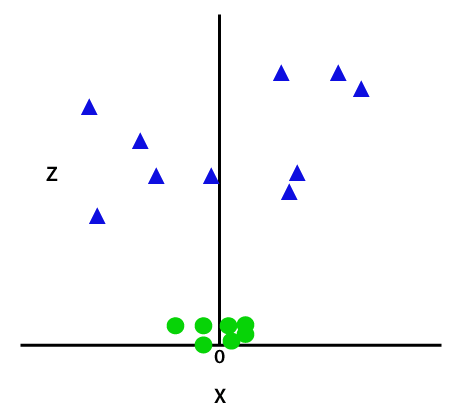

SVM divides classified data into this way. Consider the below image:

   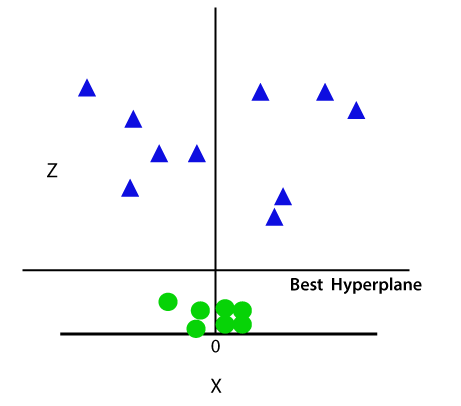

Here image actually represents 3-D space. Converting it into 2d space with z = 1, make it like as:


  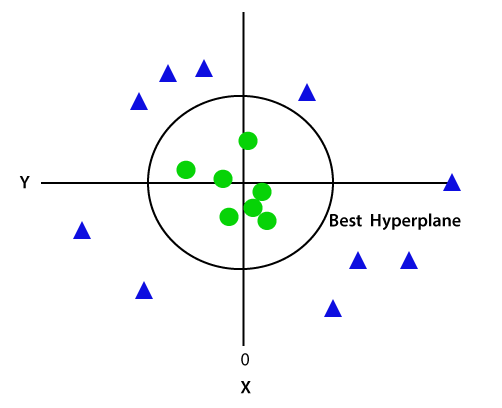

It finally creates a circumference of radius 1 for a non-linear data.


**Python Implementation of Support Vector Machine**

In [ ]:
#Importing scikit-learn
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()

In [ ]:
# print the names of all features
print("Features: ", cancer.feature_names)

# print the label outcome variable('malignant' 'benign')
print("Labels: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


In [ ]:
# shape of variable
cancer.data.shape

(569, 30)

### Splitting the data

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test

In [ ]:
#Importing SVM model
from sklearn import svm

#Creating a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
cm= confusion_matrix(y_test, y_pred) 
cm

array([[ 61,   2],
       [  4, 104]], dtype=int64)

In [ ]:
# print prediction results
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        63
           1       0.98      0.96      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



### Hyperparameter tuning using gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.963 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.925 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.938 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.962 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.924 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.963 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.925 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.938 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.962 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.924 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.963 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 1, 'kernel': 'linear'}
SVC(C=100, gamma=1, kernel='linear')


In [ ]:
#Create a svm Classifier
clf = svm.SVC(C= 100, kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        63
           1       0.99      0.96      0.98       108

    accuracy                           0.97       171
   macro avg       0.96      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [ ]:
cm= confusion_matrix(y_test, grid_predictions) 
cm

array([[ 62,   1],
       [  4, 104]], dtype=int64)